# Intorudction

This lab demonstrates how to discretize continuous features using the KBinsDiscretizer class in Scikit-learn. Discretization is the process of transforming continuous features into discrete features by dividing the feature values into a set of bins. This can be useful when working with linear models that can only model linear relationships, or to reduce the complexity of decision trees.

# Load the Required Libraries

In this step, we will import the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

# Create the Dataset

In this step, we will create a dataset with a continuous input feature and a continuous output feature. We will use the **numpy.random.RandomState()** method to generate random numbers for the input feature, and the **numpy.sin()** method to generate the output feature.

In [9]:
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1, 1)

# Visualize the Dataset

In this step, we will visualize the dataset using a scatter plot.

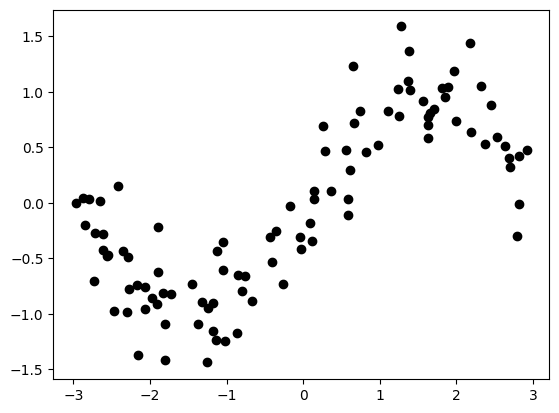

In [3]:
plt.scatter(X, y, color='black')
plt.show()

# Discretize the Input Feature

In this step, we will use the KBinsDiscretizer class to discretize the input feature. We will create 10 bins and use one-hot encoding to transform the data.

In [13]:
# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(
    n_bins=10, encode="onehot"
)
X_binned = enc.fit_transform(X)

# Visualize the Discretized Dataset

In this step, we will visualize the discretized dataset using a scatter plot.

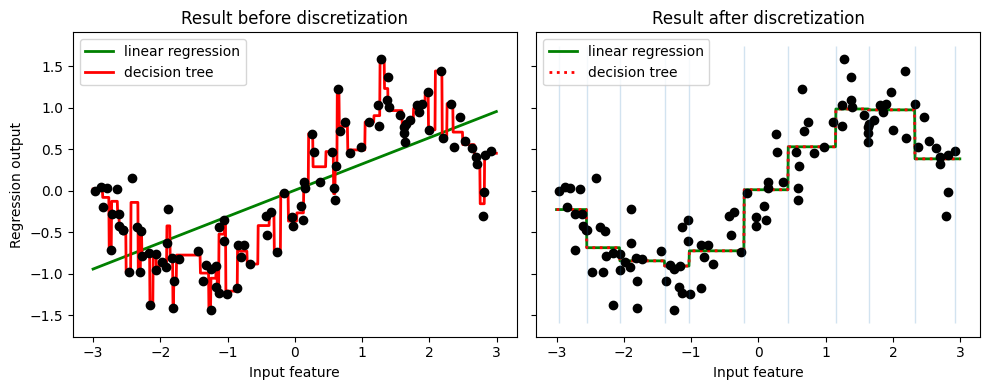

In [16]:
# predict with original dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color="green", label="linear regression")
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color="red", label="decision tree")
ax1.plot(X[:, 0], y, "o", c="k")
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# predict with transformed dataset
line_binned = enc.transform(line)
reg = LinearRegression().fit(X_binned, y)
ax2.plot(
    line,
    reg.predict(line_binned),
    linewidth=2,
    color="green",
    linestyle="-",
    label="linear regression",
)
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X_binned, y)
ax2.plot(
    line,
    reg.predict(line_binned),
    linewidth=2,
    color="red",
    linestyle=":",
    label="decision tree",
)
ax2.plot(X[:, 0], y, "o", c="k")
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=0.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()
plt.show()

# Summary

In this lab, we learned how to discretize continuous features using the KBinsDiscretizer class in Scikit-learn. Discretization can be useful when working with linear models or to reduce the complexity of decision trees. We also learned how to train linear regression and decision tree models on both the original and discretized datasets, and how to visualize the results.